In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
data_few_shot = pd.read_csv('/Users/davidsegura/git/Leveraging_LLMs_causality/cage_SAD_llm/data/few_shot_examples_6.txt', delimiter='\t')


In [3]:
with open('/Users/davidsegura/git/Leveraging_LLMs_causality/cage_SAD_llm/data/few_shot_examples_6.txt', 'r') as file:
    lines = [line.strip() for line in file]  

print(lines)


['Would the mixture involving the ditopic CC(C)(CN)CN and tritopic O=Cc1ccc(C#Cc2cc(C#Cc3ccc(C=O)cc3)cc(C#Cc3ccc(C=O)cc3)c2)cc1 building blocks be turbid or dissolved ? Knowing the following propreties about them: The cactvs fingerprints of the ditopic specie is 11000000011000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001110000000000000100000000000000000000000000000000111000000000110000010000000000000100000000100000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [4]:
lines[0]

'Would the mixture involving the ditopic CC(C)(CN)CN and tritopic O=Cc1ccc(C#Cc2cc(C#Cc3ccc(C=O)cc3)cc(C#Cc3ccc(C=O)cc3)c2)cc1 building blocks be turbid or dissolved ? Knowing the following propreties about them: The cactvs fingerprints of the ditopic specie is 110000000110001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011100000000000001000000000000000000000000000000001110000000001100000100000000000001000000001000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [75]:
data = pd.read_csv('/Users/davidsegura/git/Leveraging_LLMs_causality/cage_SAD_llm/data/data_allfor_turbi_nmr.csv')

In [76]:
data

,Unnamed: 0,id,reaction_id,experiment_number,di_name,tri_name,turbidity_label,di_smiles,tri_smiles,di_cactvs_fingerprint,...,tri_heavy_atom_count,tri_xlogp,tri_molecular_weight,tri_rotatable_bond_count,tri_tpsa,conversion_label,di_hardness,di_nbr_arom,tri_hardness,tri_nbr_arom
0,0,1,186,AB-02-005,Di1,TriA,dissolved,O=Cc1cccc(C=O)c1,Nc1nc(N)nc(N)n1,1000000001110000001100000000000000000000000000...,...,9.0,-1.4,126.12,0.0,117.0,partial,Rigid,1,Rigid,1
1,1,2,185,AB-02-005,Di1,TriB,turbid,O=Cc1cccc(C=O)c1,Cc1c(CN)c(C)c(CN)c(C)c1CN,1000000001110000001100000000000000000000000000...,...,15.0,-0.4,207.32,3.0,78.1,complete,Rigid,1,Flexible,1
2,2,3,154,AB-02-005,Di1,TriC,turbid,O=Cc1cccc(C=O)c1,NCCN(CCN)CCN,1000000001110000001100000000000000000000000000...,...,10.0,-2.6,146.23,6.0,81.3,complete,Rigid,1,Flexible,0
3,3,4,164,AB-02-005,Di1,TriD,dissolved,O=Cc1cccc(C=O)c1,CCc1c(CN)c(CC)c(CN)c(CC)c1CN,1000000001110000001100000000000000000000000000...,...,18.0,0.9,249.39,6.0,78.1,complete,Rigid,1,Flexible,1
4,4,5,188,AB-02-005,Di1,TriE,dissolved,O=Cc1cccc(C=O)c1,NCCCN(CCCN)CCCN,1000000001110000001100000000000000000000000000...,...,13.0,-1.5,188.31,9.0,81.3,complete,Rigid,1,Flexible,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,397,427,AB-02-009,Di27,TriL,turbid,NCc1ccc(CN)cc1,O=Cc1ccc(C#Cc2cc(C#Cc3ccc(C=O)cc3)cc(C#Cc3ccc(...,1100000001110011000000000000000000000000000000...,...,36.0,6.4,462.50,9.0,51.2,complete,Flexible,1,Rigid,4
351,351,398,393,AB-02-009,Di27,TriM,dissolved,NCc1ccc(CN)cc1,O=Cc1cccc(-c2cc(-c3cccc(C=O)c3)cc(-c3cccc(C=O)...,1100000001110011000000000000000000000000000000...,...,30.0,5.2,390.40,6.0,51.2,partial,Flexible,1,Rigid,4
352,352,399,416,AB-02-009,Di27,TriN,dissolved,NCc1ccc(CN)cc1,O=Cc1ccccc1-c1cc(-c2ccccc2C=O)cc(-c2ccccc2C=O)c1,1100000001110011000000000000000000000000000000...,...,30.0,5.2,390.40,6.0,51.2,complete,Flexible,1,Rigid,4
353,353,400,423,AB-02-009,Di27,TriO,dissolved,NCc1ccc(CN)cc1,O=Cc1cc(-c2cc(-c3csc(C=O)c3)cc(-c3csc(C=O)c3)c...,1100000001110011000000000000000000000000000000...,...,27.0,5.2,408.50,6.0,136.0,complete,Flexible,1,Rigid,4


In [77]:
def load_and_filter_csv(df):
    
    required_columns = [
    'di_name', 'tri_name', 'turbidity_label', 'di_smiles', 'tri_smiles',
    'di_cactvs_fingerprint', 'di_fingerprint', 'di_charge', 'di_complexity',
    'di_covalent_unit_count', 'di_defined_atom_stereo_count',
    'di_defined_bond_stereo_count', 'di_exact_mass',
    'di_h_bond_acceptor_count', 'di_h_bond_donor_count',
    'di_heavy_atom_count', 'di_xlogp', 'di_molecular_weight',
    'di_rotatable_bond_count', 'di_tpsa', 'tri_cactvs_fingerprint',
    'tri_fingerprint', 'tri_charge', 'tri_complexity',
    'tri_covalent_unit_count', 'tri_defined_atom_stereo_count',
    'tri_defined_bond_stereo_count', 'tri_exact_mass',
    'tri_h_bond_acceptor_count', 'tri_h_bond_donor_count',
    'tri_heavy_atom_count', 'tri_xlogp', 'tri_molecular_weight',
    'tri_rotatable_bond_count', 'tri_tpsa',
    'di_hardness', 'di_nbr_arom', 'tri_hardness', 'tri_nbr_arom'
    
    ]
    
    available_columns = [col for col in required_columns if col in df.columns]
    
    if not available_columns:
        print("None of the required columns are available in the Excel file.")
        return None

    
    filtered_df = df[available_columns]

    filtered_df.fillna('unknown', inplace=True)

    return filtered_df


In [78]:
data_cleaned = load_and_filter_csv(data)


/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_1892/1458163782.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna('unknown', inplace=True)


In [79]:
data_cleaned

,di_name,tri_name,turbidity_label,di_smiles,tri_smiles,di_cactvs_fingerprint,di_fingerprint,di_charge,di_complexity,di_covalent_unit_count,...,tri_h_bond_donor_count,tri_heavy_atom_count,tri_xlogp,tri_molecular_weight,tri_rotatable_bond_count,tri_tpsa,di_hardness,di_nbr_arom,tri_hardness,tri_nbr_arom
0,Di1,TriA,dissolved,O=Cc1cccc(C=O)c1,Nc1nc(N)nc(N)n1,1000000001110000001100000000000000000000000000...,0000037180703000000000000000000000000000000000...,0.0,117.0,1.0,...,3.0,9.0,-1.4,126.12,0.0,117.0,Rigid,1,Rigid,1
1,Di1,TriB,turbid,O=Cc1cccc(C=O)c1,Cc1c(CN)c(C)c(CN)c(C)c1CN,1000000001110000001100000000000000000000000000...,0000037180703000000000000000000000000000000000...,0.0,117.0,1.0,...,3.0,15.0,-0.4,207.32,3.0,78.1,Rigid,1,Flexible,1
2,Di1,TriC,turbid,O=Cc1cccc(C=O)c1,NCCN(CCN)CCN,1000000001110000001100000000000000000000000000...,0000037180703000000000000000000000000000000000...,0.0,117.0,1.0,...,3.0,10.0,-2.6,146.23,6.0,81.3,Rigid,1,Flexible,0
3,Di1,TriD,dissolved,O=Cc1cccc(C=O)c1,CCc1c(CN)c(CC)c(CN)c(CC)c1CN,1000000001110000001100000000000000000000000000...,0000037180703000000000000000000000000000000000...,0.0,117.0,1.0,...,3.0,18.0,0.9,249.39,6.0,78.1,Rigid,1,Flexible,1
4,Di1,TriE,dissolved,O=Cc1cccc(C=O)c1,NCCCN(CCCN)CCCN,1000000001110000001100000000000000000000000000...,0000037180703000000000000000000000000000000000...,0.0,117.0,1.0,...,3.0,13.0,-1.5,188.31,9.0,81.3,Rigid,1,Flexible,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,Di27,TriL,turbid,NCc1ccc(CN)cc1,O=Cc1ccc(C#Cc2cc(C#Cc3ccc(C=O)cc3)cc(C#Cc3ccc(...,1100000001110011000000000000000000000000000000...,00000371C0730000000000000000000000000000000000...,0.0,73.3,1.0,...,0.0,36.0,6.4,462.50,9.0,51.2,Flexible,1,Rigid,4
351,Di27,TriM,dissolved,NCc1ccc(CN)cc1,O=Cc1cccc(-c2cc(-c3cccc(C=O)c3)cc(-c3cccc(C=O)...,1100000001110011000000000000000000000000000000...,00000371C0730000000000000000000000000000000000...,0.0,73.3,1.0,...,0.0,30.0,5.2,390.40,6.0,51.2,Flexible,1,Rigid,4
352,Di27,TriN,dissolved,NCc1ccc(CN)cc1,O=Cc1ccccc1-c1cc(-c2ccccc2C=O)cc(-c2ccccc2C=O)c1,1100000001110011000000000000000000000000000000...,00000371C0730000000000000000000000000000000000...,0.0,73.3,1.0,...,0.0,30.0,5.2,390.40,6.0,51.2,Flexible,1,Rigid,4
353,Di27,TriO,dissolved,NCc1ccc(CN)cc1,O=Cc1cc(-c2cc(-c3csc(C=O)c3)cc(-c3csc(C=O)c3)c...,1100000001110011000000000000000000000000000000...,00000371C0730000000000000000000000000000000000...,0.0,73.3,1.0,...,0.0,27.0,5.2,408.50,6.0,136.0,Flexible,1,Rigid,4


In [10]:
prompts_few_shot = [
    f"Would the mixture involving the ditopic {row['di_smiles']} and tritopic {row['tri_smiles']} building blocks be turbid or dissolved ? Knowing the following propreties about them: "
    
    f"The number of hydrogen bond acceptors in the ditopic specie is  {row['di_h_bond_acceptor_count']} and of the tritopic specie is {row['tri_h_bond_acceptor_count']}. "
    f"The number of hydrogen bond donnor in the ditopic specie is {row['di_h_bond_donor_count']} and of the tritopic specie is {row['tri_h_bond_donor_count']}. "
    f"The logP (octanol/water partition coefficient) of the ditopic specie is {row['di_xlogp']} and of the tritopic specie is {row['tri_xlogp']}. "
    f"The TPSA (topological polar surface area) of the ditopic specie is {row['di_tpsa']} and of the tritopic specie is {row['tri_tpsa']}. "

    for index, row in data_cleaned.head(1).iterrows()
]



In [19]:
prompts_few_shot[0]

'Would the mixture involving the ditopic O=Cc1cccc(C=O)c1 and tritopic Nc1nc(N)nc(N)n1 building blocks be turbid or dissolved ? Knowing the following propreties about them: The number of hydrogen bond acceptors in the ditopic specie is  2.0 and of the tritopic specie is 6.0. The number of hydrogen bond donnor in the ditopic specie is 0.0 and of the tritopic specie is 3.0. The logP (octanol/water partition coefficient) of the ditopic specie is 1.2 and of the tritopic specie is -1.4. The TPSA (topological polar surface area) of the ditopic specie is 34.1 and of the tritopic specie is 117.0. '

In [20]:
for index, words in enumerate(prompts_few_shot[0]):
    print(index, words, sep=" ")

0 W
1 o
2 u
3 l
4 d
5  
6 t
7 h
8 e
9  
10 m
11 i
12 x
13 t
14 u
15 r
16 e
17  
18 i
19 n
20 v
21 o
22 l
23 v
24 i
25 n
26 g
27  
28 t
29 h
30 e
31  
32 d
33 i
34 t
35 o
36 p
37 i
38 c
39  
40 O
41 =
42 C
43 c
44 1
45 c
46 c
47 c
48 c
49 (
50 C
51 =
52 O
53 )
54 c
55 1
56  
57 a
58 n
59 d
60  
61 t
62 r
63 i
64 t
65 o
66 p
67 i
68 c
69  
70 N
71 c
72 1
73 n
74 c
75 (
76 N
77 )
78 n
79 c
80 (
81 N
82 )
83 n
84 1
85  
86 b
87 u
88 i
89 l
90 d
91 i
92 n
93 g
94  
95 b
96 l
97 o
98 c
99 k
100 s
101  
102 b
103 e
104  
105 t
106 u
107 r
108 b
109 i
110 d
111  
112 o
113 r
114  
115 d
116 i
117 s
118 s
119 o
120 l
121 v
122 e
123 d
124  
125 ?
126  
127 K
128 n
129 o
130 w
131 i
132 n
133 g
134  
135 t
136 h
137 e
138  
139 f
140 o
141 l
142 l
143 o
144 w
145 i
146 n
147 g
148  
149 p
150 r
151 o
152 p
153 r
154 e
155 t
156 i
157 e
158 s
159  
160 a
161 b
162 o
163 u
164 t
165  
166 t
167 h
168 e
169 m
170 :
171  
172 T
173 h
174 e
175  
176 n
177 u
178 m
179 b
180 e
181 r
182  
183 o
184 f


Word frequencies

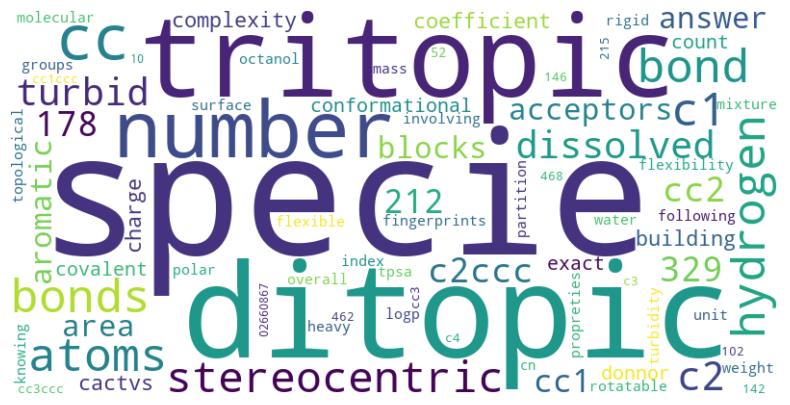

In [12]:
corpus = lines
# Calculate TF-IDF scores
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dictionary of words and their scores
word_importance = dict(zip(feature_names, tfidf_scores))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis').generate_from_frequencies(word_importance)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Attention weight based vizualisation

In [12]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load a pre-trained model and tokenizer
model_name = "bert-base-uncased"  # You can replace this with other transformer models
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)


/Users/davidsegura/miniconda3/envs/env_cage/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
text = prompts_few_shot

# Tokenize and encode the input text
inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
outputs = model(**inputs)

# Extract attention weights
attentions = outputs.attentions  # List of attention matrices for each layer


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [14]:
first_layer_attentions = attentions[0]  # Get attention for the first layer
first_head_attention = first_layer_attentions[0][0]  # First element of the batch and first head

In [18]:
type(prompts_few_shot)

list

In [17]:
for index, words in enumerate(prompts_few_shot):
    print(index, words, sep=" ")

0 Would the mixture involving the ditopic O=Cc1cccc(C=O)c1 and tritopic Nc1nc(N)nc(N)n1 building blocks be turbid or dissolved ? Knowing the following propreties about them: The number of hydrogen bond acceptors in the ditopic specie is  2.0 and of the tritopic specie is 6.0. The number of hydrogen bond donnor in the ditopic specie is 0.0 and of the tritopic specie is 3.0. The logP (octanol/water partition coefficient) of the ditopic specie is 1.2 and of the tritopic specie is -1.4. The TPSA (topological polar surface area) of the ditopic specie is 34.1 and of the tritopic specie is 117.0. 


In [35]:
import nltk

# Set a directory for nltk_data in a writable location
nltk.data.path.append('/Users/davidsegura/nltk_data')
nltk.download('punkt', download_dir='/Users/davidsegura/nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidsegura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/Users/davidsegura/miniconda3/envs/env_cage/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


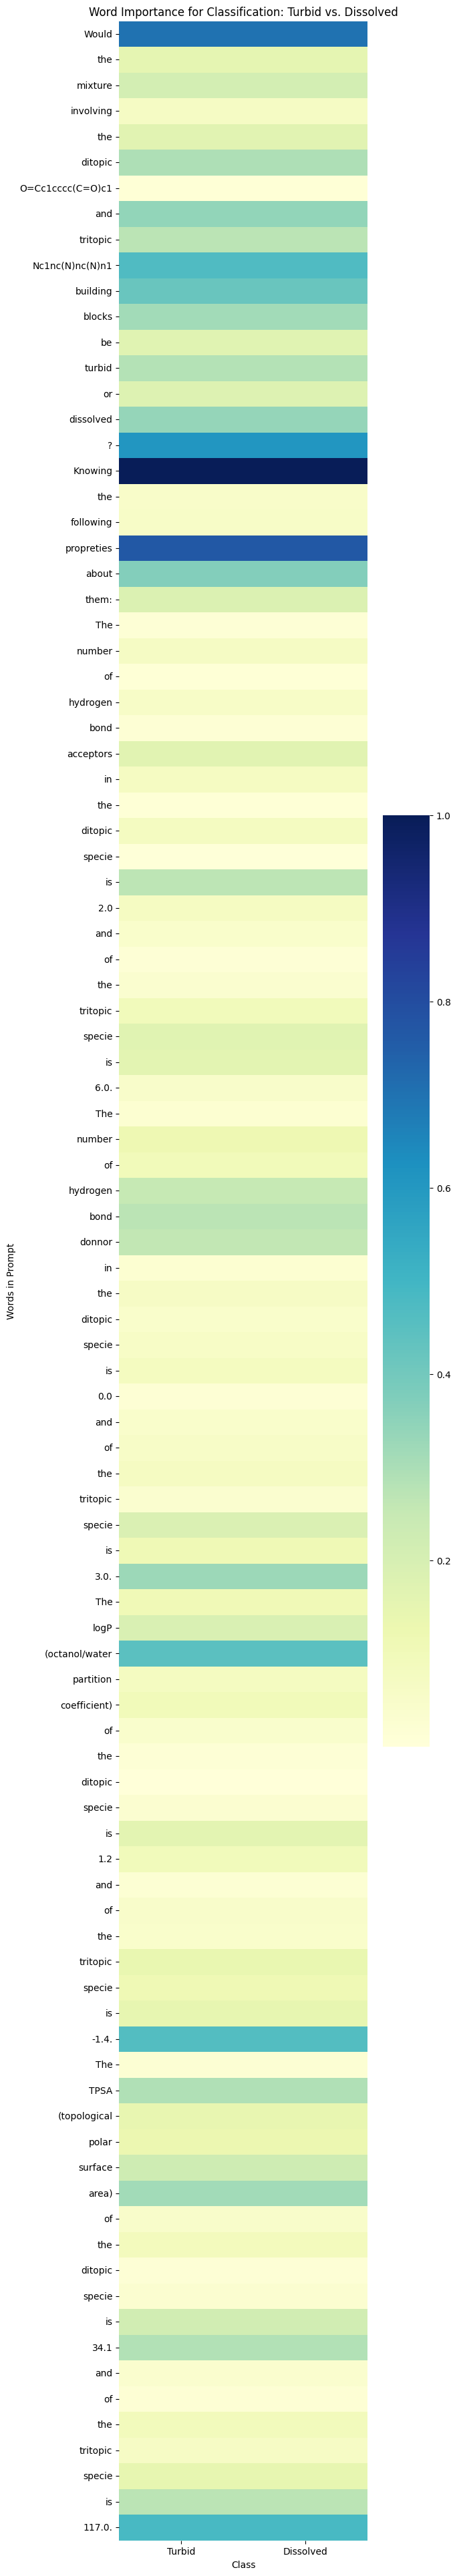

In [54]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import numpy as np

model_name = "allenai/scibert_scivocab_uncased" # to change with a fine-tunned model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # binary classification

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

prompt =  prompts_few_shot[0]

# Tokenize the prompt at word level
words = prompt.split()  # simple word-level tokenization
base_scores = classifier(prompt)[0] 

# Perturbaton study, where the words will be masked and the effect on the prediction will be made
importance_scores_turbid = []
importance_scores_dissolved = []

for i, word in enumerate(words):
    perturbed_prompt = " ".join(words[:i] + ["[MASK]"] + words[i+1:])  # Mask the word
    perturbed_scores = classifier(perturbed_prompt)[0]  # get prediction on perturbed prompt
    
    # Calculate importance scores based on the difference in probabilities for each class
    score_diff_turbid = abs(base_scores[0]['score'] - perturbed_scores[0]['score'])  # class 0 (turbid)
    score_diff_dissolved = abs(base_scores[1]['score'] - perturbed_scores[1]['score'])  # class 1 (dissolved)
    
    # Store the importance scores for each class
    importance_scores_turbid.append(score_diff_turbid)
    importance_scores_dissolved.append(score_diff_dissolved)

# Normalize scores for plotting
max_score_turbid = max(importance_scores_turbid)
max_score_dissolved = max(importance_scores_dissolved)
importance_scores_turbid = [score / max_score_turbid for score in importance_scores_turbid]
importance_scores_dissolved = [score / max_score_dissolved for score in importance_scores_dissolved]

importance_scores = np.array([importance_scores_turbid, importance_scores_dissolved]).T

annot = np.array([[word, word] for word in words])

plt.figure(figsize=(6, len(words) * 0.5))
sns.heatmap(importance_scores, fmt="", cmap="YlGnBu", cbar=True, 
            yticklabels=words, xticklabels=["Turbid", "Dissolved"])
plt.title("Word Importance for Classification: Turbid vs. Dissolved")
plt.ylabel("Words in Prompt")
plt.xlabel("Class")
plt.show()


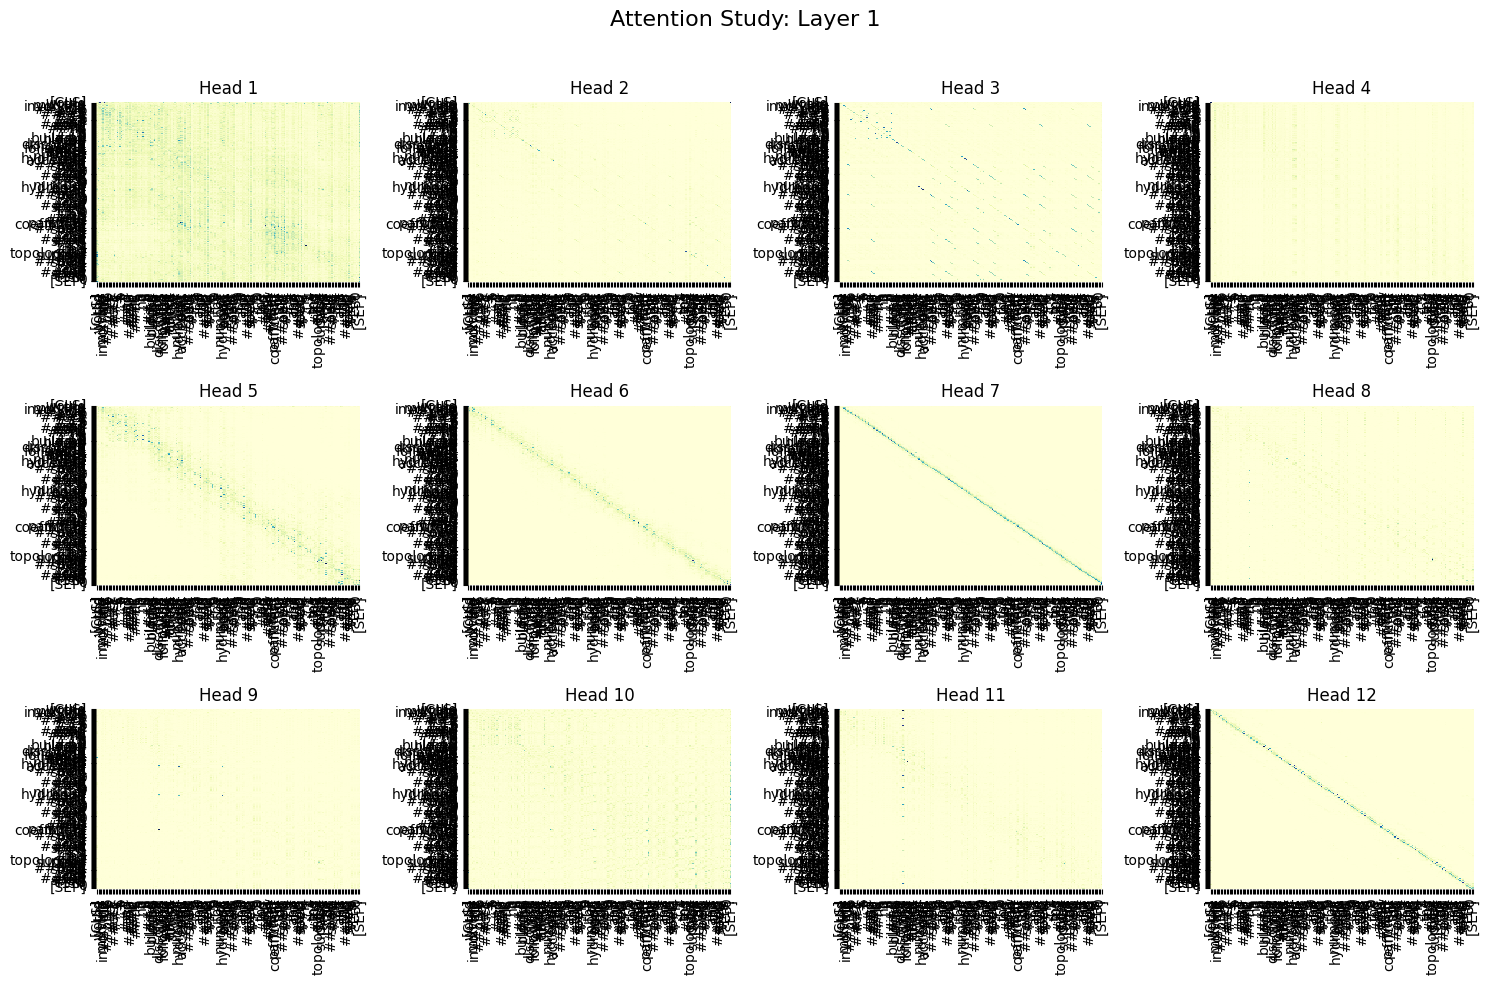

In [59]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
import numpy as np

# Load SciBERT model with output_attentions enabled
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Define the prompt and tokenize it
prompt = prompts_few_shot[0]
inputs = tokenizer(prompt, return_tensors="pt")

# Pass the inputs through the model to obtain attention weights
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # Attention weights for each layer and head

# Select the layer you want to analyze
layer_num = 0  # Use the first layer for demonstration; you can adjust this

# Get the number of heads in the selected layer
num_heads = attentions[layer_num].shape[1]

# Decode tokens for labeling
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot attention for each head in the specified layer as a grid of subplots
num_cols = 4
num_rows = int(np.ceil(num_heads / num_cols))

plt.figure(figsize=(15, 10))
for head_num in range(num_heads):
    # Extract attention weights for the selected layer and head
    attention_weights = attentions[layer_num][0][head_num].cpu().numpy()
    
    # Normalize attention weights
    max_attention = np.max(attention_weights)
    normalized_attention = attention_weights / max_attention if max_attention > 0 else attention_weights

    # Plot the heatmap for this head
    ax = plt.subplot(num_rows, num_cols, head_num + 1)
    sns.heatmap(normalized_attention, cmap="YlGnBu", xticklabels=tokens, yticklabels=tokens, cbar=False, ax=ax)
    ax.set_title(f"Head {head_num + 1}")
    ax.tick_params(axis='x', rotation=90)
    ax.tick_params(axis='y', rotation=0)

# Set overall plot title and adjust layout
plt.suptitle(f"Attention Study: Layer {layer_num + 1}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


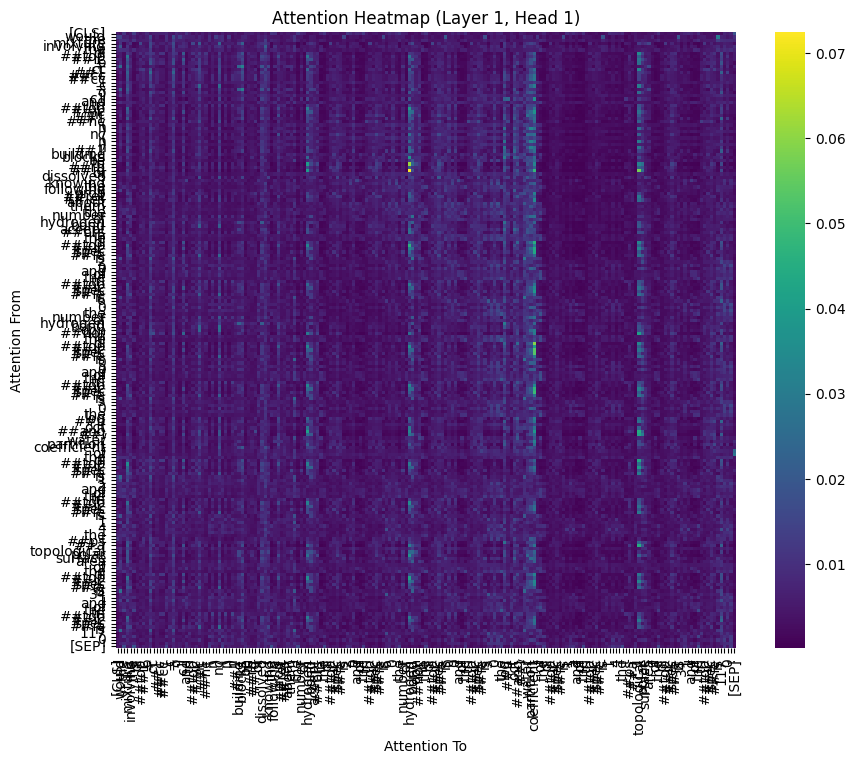

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Decode the tokens to labels for heatmap annotations
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

selected_indices = [1, 3, 5, 10, 15]  
selected_tokens = [tokens[i] for i in selected_indices]
selected_attention = first_head_attention[selected_indices, :][:, selected_indices]

# Plot attention for a specific head in a specific layer
plt.figure(figsize=(10, 8))
sns.heatmap(first_head_attention.detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title("Attention Heatmap (Layer 1, Head 1)")
plt.xlabel("Attention To")
plt.ylabel("Attention From")
plt.show()

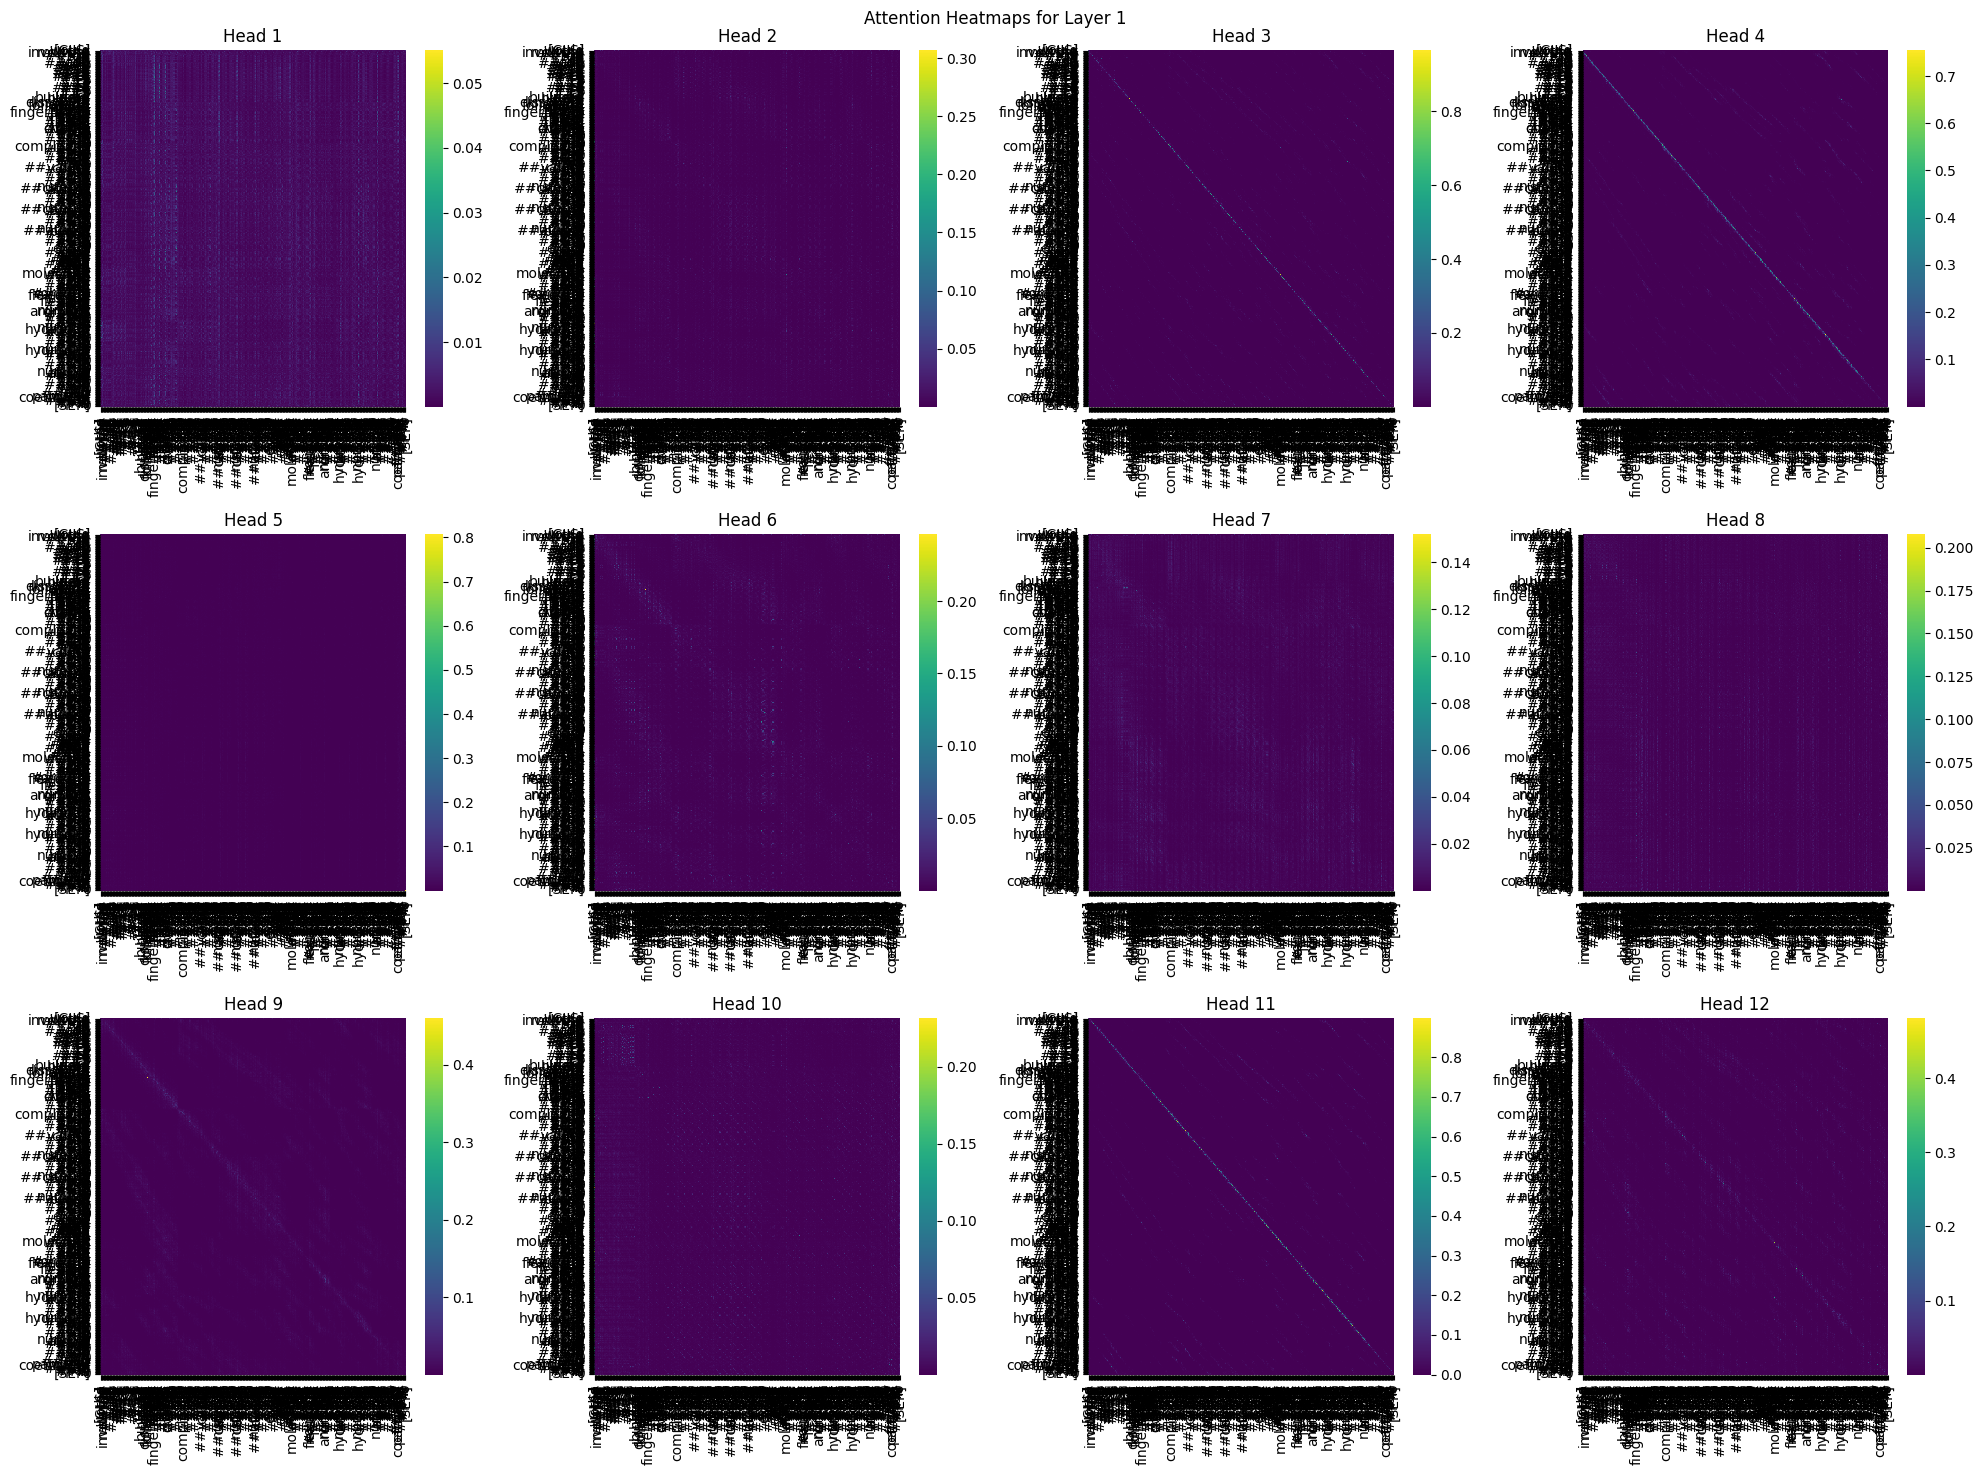

In [20]:
# Example: Plot all heads in the first layer
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Adjust dimensions based on the number of heads
for i, ax in enumerate(axes.flat):
    sns.heatmap(attentions[0][0][i].detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="viridis", ax=ax)
    ax.set_title(f"Head {i + 1}")
plt.suptitle("Attention Heatmaps for Layer 1")
plt.tight_layout()
plt.show()


In [62]:
import torch
from transformers import AutoTokenizer, AutoModel, pipeline
from IPython.display import display, HTML
import matplotlib

# Initialize model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Define a prompt
prompt = prompts_few_shot[0]
words = prompt.split()  # Tokenize at word level

# Create a text classification pipeline to measure attention across the whole prompt
nlp = pipeline("feature-extraction", model=model, tokenizer=tokenizer)

inputs = tokenizer(prompt, return_tensors="pt")
outputs = model(**inputs)
attention = outputs.attentions[-1]  # Use the last layer's attention scores

cls_attention = attention.mean(dim=1).squeeze()[0, 1:].tolist()  # Exclude CLS token itself

max_attention = max(cls_attention)
min_attention = min(cls_attention)
normalized_attention = [(score - min_attention) / (max_attention - min_attention) for score in cls_attention]

def attention_to_color(attention_score):
    """Convert attention score to a red color intensity"""
    cmap = matplotlib.cm.get_cmap("Reds")
    rgba = cmap(attention_score)
    return matplotlib.colors.rgb2hex(rgba)

html_content = "<div style='font-size: 16px; line-height: 1.6;'>"
for word, score in zip(words, normalized_attention):
    color = attention_to_color(score)
    html_content += f"<span style='background-color: {color}; padding:2px; border-radius: 3px; margin: 1px;'>{word}</span> "
html_content += "</div>"

display(HTML(html_content))


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_1892/2222201899.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Reds")
